In [6]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb


In [15]:
# File to Load (Remember to change these)
city_df =  pd.read_csv('data/city_data.csv')
ride_df =  pd.read_csv('data/ride_data.csv')


# Read the City and Ride Data
city_df.head()
citytype= city_df.drop_duplicates('city')
ride_df.head()

,city,date,fare,ride_id
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344


In [16]:
# Combine the data into a single dataset
merge_df = ride_df.merge(city_df, on="city")
merge_df.head()
GroupedCity = merge_df.groupby(['city'])

In [17]:
# Display the data table for preview
merge_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,Lake Jonathanshire,2018-04-07 20:51:11,31.25,4441251834598,5,Urban
2,Lake Jonathanshire,2018-03-09 23:45:55,19.89,2389495660448,5,Urban
3,Lake Jonathanshire,2018-04-07 18:09:21,24.28,7796805191168,5,Urban
4,Lake Jonathanshire,2018-01-02 14:14:50,13.89,424254840012,5,Urban


In [21]:
urban_cities = merge_df[merge_df['type'] == "Urban"]
suburban_cities = merge_df[merge_df['type'] == "Suburban"]
rural_cities = merge_df[merge_df['type'] == "Rural"]

In [22]:
urban_ride_count = urban_cities.groupby(["city"]).count()["ride_id"]
urban_avg_fare = urban_cities.groupby(['city']).mean()["fare"]
urban_driver_count = urban_cities.groupby(["city"]).mean()["driver_count"]

suburban_ride_count = suburban_cities.groupby(["city"]).count()["ride_id"]
suburban_avg_fare = suburban_cities.groupby(['city']).mean()["fare"]
suburban_driver_count = suburban_cities.groupby(["city"]).mean()["driver_count"]

rural_ride_count = rural_cities.groupby(["city"]).count()["ride_id"]
rural_avg_fare = rural_cities.groupby(['city']).mean()["fare"]
rural_driver_count = rural_cities.groupby(["city"]).mean()["driver_count"]

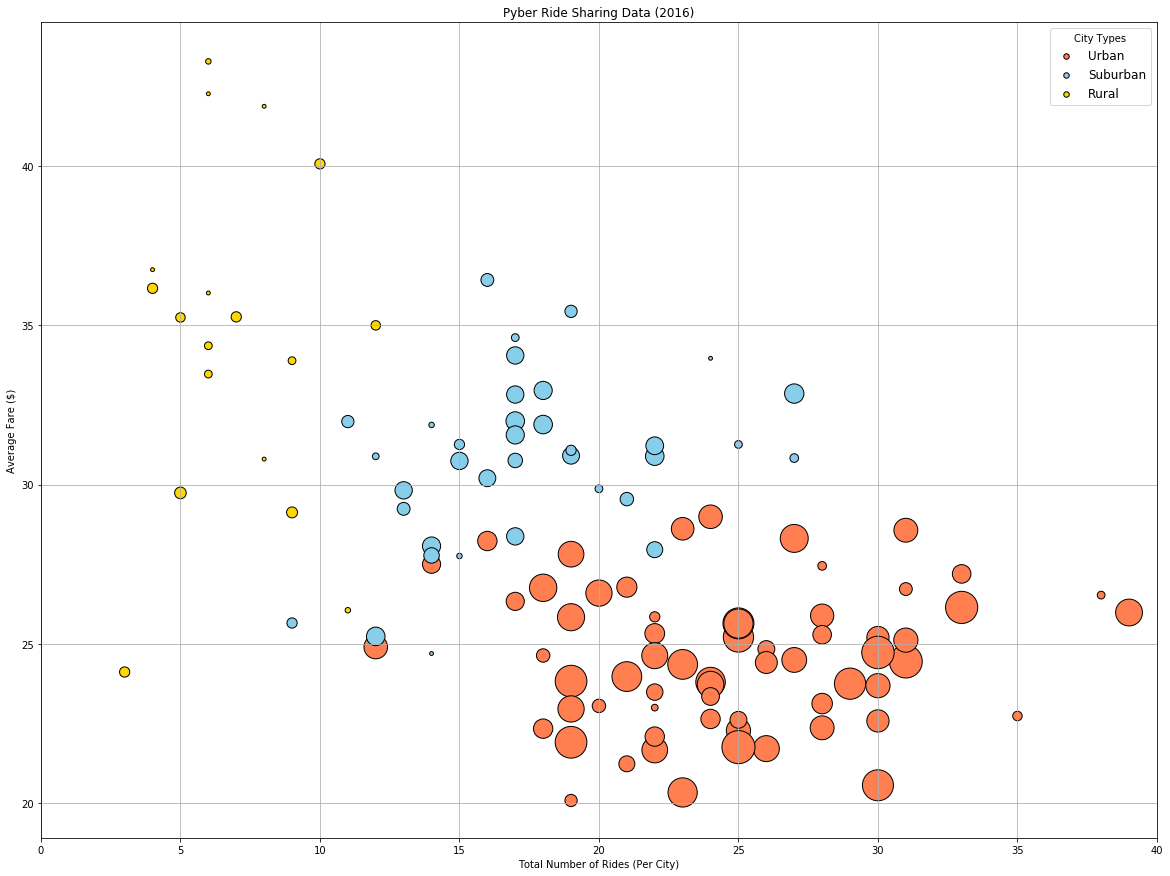

In [60]:
plt.figure(figsize=(20, 15))
plt.scatter(x =urban_ride_count, y=urban_avg_fare, s= 15*urban_driver_count, c="coral", edgecolor="black", alpha=1.0, label = "Urban")
plt.scatter(x =suburban_ride_count, y=suburban_avg_fare, s= 15*suburban_driver_count, c="skyblue", edgecolor="black", alpha=1.0, label = "Suburban")
plt.scatter(x =rural_ride_count, y=rural_avg_fare, s= 15*rural_driver_count, c="gold", edgecolor="black", alpha=1.0, label = "Rural")

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data (2016)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.xlim((0,40))
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="large", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]

plt.xlim((0,40))
plt.title("Pyber Ride Sharing Data (2016)")

plt.savefig("Fig1.png")

## Bubble Plot of Ride Sharing Data

In [24]:
plt.show()

In [2]:
# Obtain the x and y coordinates for each of the three city types

# Build the scatter plots for each city types

# Incorporate the other graph properties

# Create a legend

# Incorporate a text label regarding circle size

# Save Figure


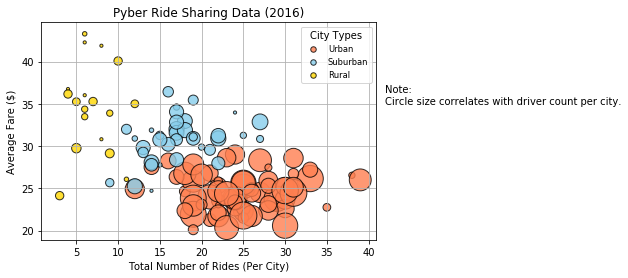

In [3]:
# Show plot
plt.show()

## Total Fares by City Type

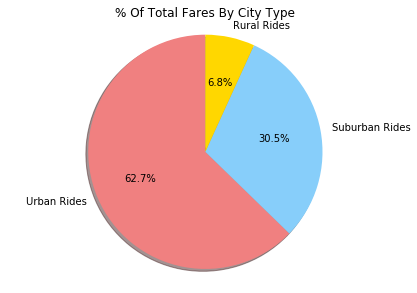

In [61]:
# Calculate Type Percents

total_fare = merge_df['fare'].sum()
urban_fare = urban_cities['fare'].sum()
suburban_fare = suburban_cities['fare'].sum()
rural_fare = rural_cities['fare'].sum()

urban_percentage =urban_fare/total_fare*100
suburban_percentage=suburban_fare/total_fare*100
rural_percentage=rural_fare/total_fare*100

# Build Pie Chart

labels = ['Urban Rides', 'Suburban Rides', 'Rural Rides']
sizes = [urban_percentage, suburban_percentage, rural_percentage]
colors = ['lightcoral', 'lightskyblue', 'gold']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title("% Of Total Fares By City Type")

# Save Figure

plt.savefig("Fig2.png")


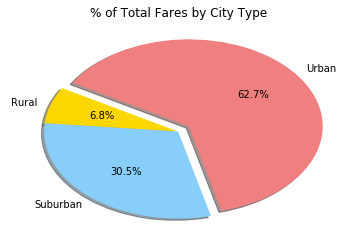

In [4]:
# Show Figure
plt.show()

## Total Rides by City Type

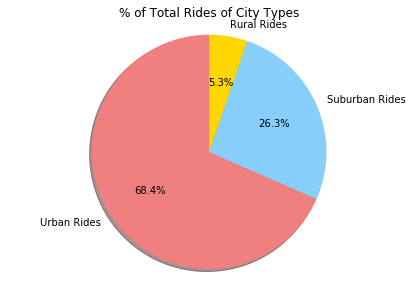

In [62]:
# Calculate Ride Percents

total_rides = merge_df['ride_id'].count()
urban_rides = urban_cities['ride_id'].count()
suburban_rides = suburban_cities['ride_id'].count()
rural_rides = rural_cities['ride_id'].count()

# Calculate Ride Percents
urban_percentage =urban_rides/total_rides*100
suburban_percentage=suburban_rides/total_rides*100
rural_percentage=rural_rides/total_rides*100

# Build Pie Chart

labels = ['Urban Rides', 'Suburban Rides', 'Rural Rides']
sizes = [urban_percentage, suburban_percentage, rural_percentage]
colors = ['lightcoral', 'lightskyblue', 'gold']
explode= [0, 0, 0.1] 
plt.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title("% of Total Rides of City Types")

# Save Figure

plt.savefig("Fig3.png")

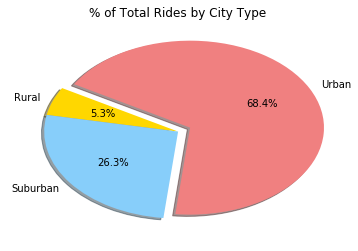

In [5]:
# Show Figure
plt.show()

## Total Drivers by City Type

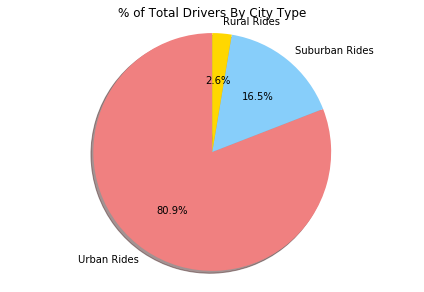

In [63]:
# Calculate Driver Percents

total_drivers = city_df['driver_count'].sum()
urban_drivers = city_df[city_df['type'] == "Urban"]['driver_count'].sum()
suburban_drivers = city_df[city_df['type'] == "Suburban"]['driver_count'].sum()
rural_drivers = city_df[city_df['type'] == "Rural"]['driver_count'].sum()

urban_percentage =urban_drivers/total_drivers*100
suburban_percentage=suburban_drivers/total_drivers*100
rural_percentage=rural_drivers/total_drivers*100

# Build Pie Charts

labels = ['Urban Rides', 'Suburban Rides', 'Rural Rides']
sizes = [urban_percentage, suburban_percentage, rural_percentage]
colors = ['lightcoral', 'lightskyblue', 'gold']
plt.pie(sizes, colors=colors, shadow=True, startangle=90, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.tight_layout()
plt.title("% of Total Drivers By City Type")

# Save Figure

plt.savefig("Fig4.png")

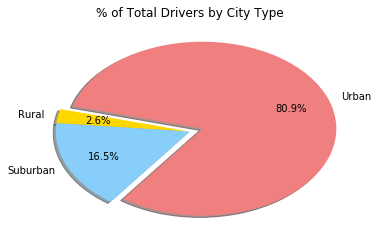

In [6]:
# Show Figure
plt.show()